In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [201]:
gp=pd.read_csv("C:/Users/harik/Downloads/googleplaystore.csv")

In [202]:
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

In [203]:
##Finding the missing values

In [204]:
category_mean=gp.groupby('Category')['Rating'].transform('mean')

In [205]:
category_mean

0        4.358065
1        4.358065
2        4.358065
3        4.358065
4        4.358065
           ...   
10836    4.192272
10837    4.192272
10838    4.189143
10839    4.346067
10840    4.094904
Name: Rating, Length: 10841, dtype: float64

In [206]:
gp['Rating']=gp['Rating'].fillna(category_mean)
gp['Type']=gp['Type'].fillna(value='Free')
gp['Content Rating']=gp['Content Rating'].fillna(value='Everyone')
gp['Current Ver']=gp['Current Ver'].fillna(value='Version not mentioned')
gp['Android Ver']=gp['Android Ver'].fillna(value='Andriod ver not mentioned')

In [207]:
gp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [208]:
##finding duplicates

In [209]:
gp.duplicated().sum()

483

In [211]:
gp.drop_duplicates(keep='first',inplace=True)

In [212]:
gp.shape

(10358, 13)

In [213]:
#Number of Contents in Different Categories

<Axes: >

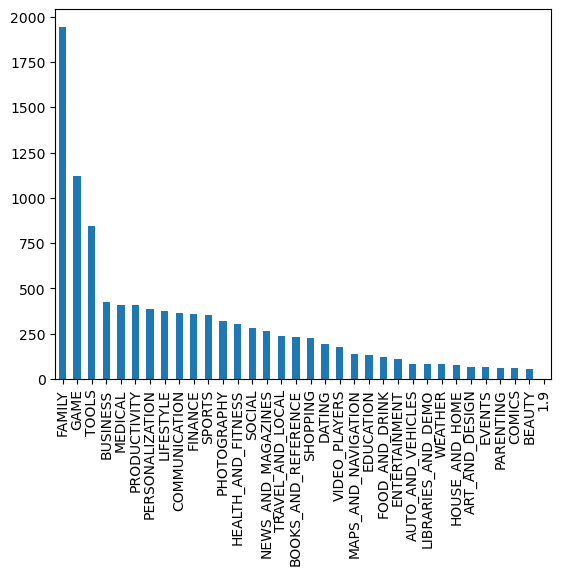

In [214]:
gp["Category"].value_counts().plot(kind="bar")

In [215]:
#Range of Rating min,max,quantile ranges

<Axes: xlabel='Rating'>

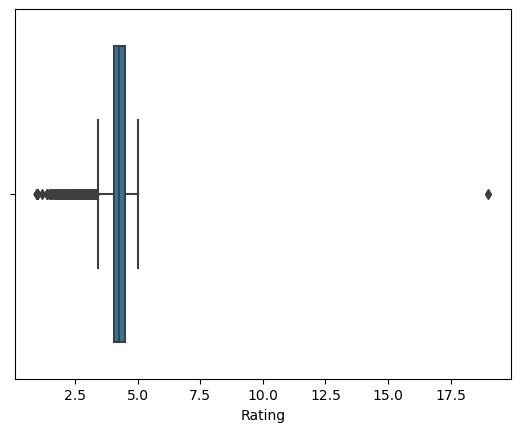

In [216]:
sns.boxplot(data=gp,x="Rating")

In [217]:
#Number of installs

[Text(0, 0, '10,000+'),
 Text(1, 0, '500,000+'),
 Text(2, 0, '5,000,000+'),
 Text(3, 0, '50,000,000+'),
 Text(4, 0, '100,000+'),
 Text(5, 0, '50,000+'),
 Text(6, 0, '1,000,000+'),
 Text(7, 0, '10,000,000+'),
 Text(8, 0, '5,000+'),
 Text(9, 0, '100,000,000+'),
 Text(10, 0, '1,000,000,000+'),
 Text(11, 0, '1,000+'),
 Text(12, 0, '500,000,000+'),
 Text(13, 0, '50+'),
 Text(14, 0, '100+'),
 Text(15, 0, '500+'),
 Text(16, 0, '10+'),
 Text(17, 0, '1+'),
 Text(18, 0, '5+'),
 Text(19, 0, '0+'),
 Text(20, 0, '0'),
 Text(21, 0, 'Free')]

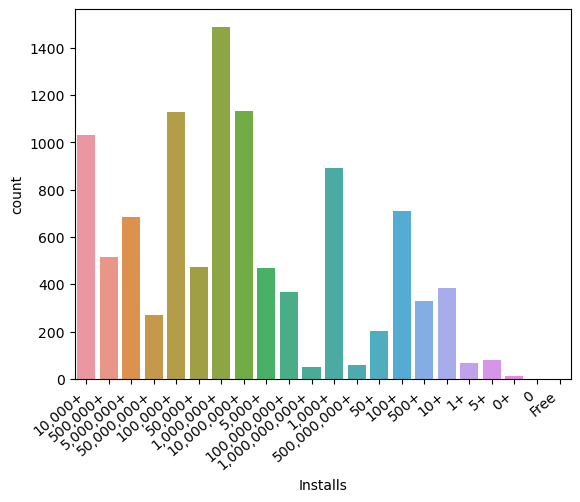

In [218]:
ax=sns.countplot(data=gp,x="Installs")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [225]:
sorted_reviews=gp["Reviews"].sort_values(ascending=False)
sorted_reviews.head(10)

2989     9992
4970      999
2705     9975
3229     9971
3049     9971
7002      997
6724     9966
7982      996
353     99559
326      9952
Name: Reviews, dtype: object

In [ ]:
sns.catplot(data=gp,x="App",y="Size",kind="boxen")